In [417]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import os
import datetime
from sklearn.svm import SVR
from skforecast.ForecasterBaseline import ForecasterEquivalentDate

parameters = {
    "dataset":{
        "path": "../data/Processed_Data/DemandDataset.csv",
        "trainingSize": .70,
        "validationSize": .15,
        "testSize": .15
    }
}

In [418]:
#Read Dataset {Path Dataset}
df = pd.read_csv(parameters["dataset"]["path"])
df["Date"] = pd.to_datetime(df["Date"])
df.head(5)

C:\Users\ssanchez\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning:

Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\ssanchez\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning:

RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



,Date,Demand
0,2018-01-01 00:15:00,8
1,2018-01-01 00:30:00,8
2,2018-01-01 00:45:00,8
3,2018-01-01 01:00:00,8
4,2018-01-01 01:15:00,8


In [419]:
#Dataset Split
#Podriamos probar otra estrategia para hacer el split
trainingSize = int(parameters["dataset"]["trainingSize"] * df.shape[0])
validationSize = trainingSize + int(parameters["dataset"]["validationSize"] * df.shape[0])
trainingLastDate = str(df.loc[[trainingSize]]["Date"].values[0])
validationLastDate = str(df.loc[[validationSize]]["Date"].values[0])
print(type(trainingLastDate))
x_train = df.loc[:trainingSize, :].copy()
x_val = df.loc[trainingSize : validationSize, :].copy()
x_test = df.loc[validationSize:, :].copy()


df = df.set_index("Date")
df = df.asfreq("15min")
x_train = x_train.set_index("Date")
x_train = x_train.asfreq("15min")
x_val = x_val.set_index("Date")
x_val = x_val.asfreq("15min")
x_test = x_test.set_index("Date")
x_test = x_test.asfreq("15min")
print(f"Whole Dataset Size: {df.shape[0]}")
print(f"Trainig Dataset Size: {x_train.shape[0]}")
print(f"Validation Dataset Size: {x_val.shape[0]}")
print(f"Test Dataset Size: {x_test.shape[0]}")


<class 'str'>
Whole Dataset Size: 70080
Trainig Dataset Size: 49057
Validation Dataset Size: 10513
Test Dataset Size: 10512


In [420]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_train.index, y=x_train["Demand"], mode="lines", name="Train"))
fig.add_trace(go.Scatter(x=x_val.index, y=x_val["Demand"], mode="lines", name="Validation"))
fig.add_trace(go.Scatter(x=x_test.index, y=x_test["Demand"], mode="lines", name="Test"))
fig.update_layout(
    title = "Dataset Partition",
    xaxis_title = "Date",
    yaxis_title ="Demand (MWh)",
    width = 1000,
    height = 400,
    margin = dict(l=30, r=20, t=35, b=60),
    legend = dict(
        orientation = "h",
        yanchor = "bottom",
        y = 1.05,
        xanchor = "right",
        x=1
    )
)
fig.show()

In [421]:
x_train

C:\Users\ssanchez\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning:

Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\ssanchez\AppData\Roaming\Python\Python312\site-packages\IPython\core\formatters.py:347: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



,Demand
Date,
2018-01-01 00:15:00,8
2018-01-01 00:30:00,8
2018-01-01 00:45:00,8
2018-01-01 01:00:00,8
2018-01-01 01:15:00,8
...,...
2019-05-26 23:15:00,20
2019-05-26 23:30:00,16
2019-05-26 23:45:00,16


In [422]:
baselineForecaster = ForecasterEquivalentDate(
    offset= pd.DateOffset(weeks=1),
    n_offsets=1
)
baselineForecaster.fit(y=x_train["Demand"])
baselineForecaster

ForecasterEquivalentDate 
Offset: <DateOffset: weeks=1> 
Number of offsets: 1 
Aggregation function: mean 
Window size: 672 
Training range: [Timestamp('2018-01-01 00:15:00'), Timestamp('2019-05-27 00:15:00')] 
Training index type: DatetimeIndex 
Training index frequency: 15min 
Creation date: 2024-04-19 12:57:21 
Last fit date: 2024-04-19 12:57:21 
Skforecast version: 0.11.0 
Python version: 3.12.2 
Forecaster id: None 

In [423]:
predictions = baselineForecaster.predict(steps = 96*7)
predictions.values

array([ 12.,  12.,   8.,  12.,   8.,  12.,   8.,  12.,   8.,  12.,   8.,
        12.,  12.,   8.,  12.,  12.,   8.,  12.,   8.,  12.,   8.,  12.,
        16.,  16.,  24.,  44.,  40.,  32.,  28.,  24.,  24.,  72.,  40.,
        48.,  56.,  68.,  68.,  76.,  76.,  80.,  76.,  76.,  80.,  80.,
        80.,  76.,  88.,  76.,  76.,  76.,  76.,  72.,  76.,  72.,  72.,
        72.,  64.,  60.,  60.,  64.,  56.,  68.,  56.,  64.,  76.,  80.,
        72.,  76.,  80.,  76.,  80.,  80.,  80.,  76.,  88.,  80.,  84.,
        80.,  80.,  76.,  76.,  72.,  56.,  20.,  12.,   8.,  12.,   8.,
        12.,   8.,  12.,  12.,   8.,  12.,   8.,  12.,   8.,  12.,   8.,
        12.,   8.,  12.,   8.,  12.,   8.,  12.,  12.,   8.,  12.,   8.,
        12.,   8.,  12.,   8.,  12.,   8.,  12.,  12.,  12.,  16.,  20.,
        40.,  32.,  24.,  28.,  28.,  24.,  68.,  40.,  44.,  60.,  56.,
        64.,  76.,  76.,  80.,  80.,  76.,  80.,  84.,  80.,  76.,  88.,
        76.,  80.,  80.,  76.,  72.,  76.,  76.,  7

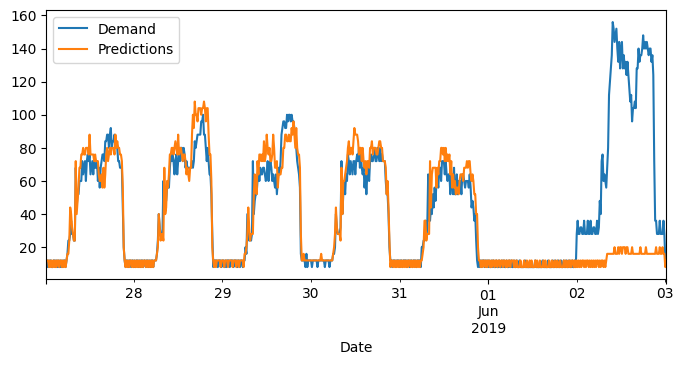

In [424]:
test_val = x_val.loc[(x_val.index <  x_val.index.min() + datetime.timedelta(days=7))]

fig, ax = plt.subplots(figsize=(8, 3.5))
test_val.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='Predictions')
ax.legend()
